In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data_size = 1000
age = np.random.randint(18, 70, data_size)
income = np.random.randint(20000, 100000, data_size)
loan_amount = np.random.randint(1000, 50000, data_size)
credit_score = 0.3 * age + 0.5 * (income / 1000) - 0.2 * (loan_amount / 1000) + np.random.normal(0, 10, data_size)

# Create DataFrame
data = pd.DataFrame({
    'age': age,
    'income': income,
    'loan_amount': loan_amount,
    'credit_score': credit_score
})

# Display first few rows of the data
print(data.head())


   age  income  loan_amount  credit_score
0   56   54674        48055     46.399861
1   69   55854        47733     64.976036
2   46   66271        20508     48.630232
3   32   93688        43287     51.044563
4   60   58518        14380     46.326843


In [3]:
# Define features and target variable
X = data[['age', 'income', 'loan_amount']]
y = data['credit_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


Mean Squared Error: 93.86
R-squared: 0.62


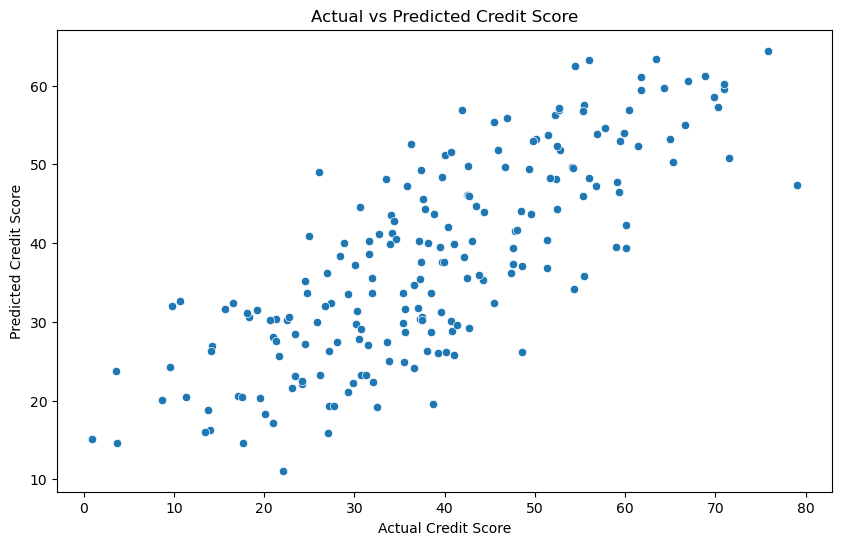

In [5]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Score')
plt.show()
